# Problem Set 5

## Question 2 a)

To do this, we start from each object's derived mass-radius relationship as derived in class and in the textbook. (notably, eqs. 18.17, 18.41 and 18.54). After which, we manipulate these to obtain relations of the form $log(\frac{R}{1000}) = f(log(\frac{M}{M_{\odot}})$ where log is base 10 as per the question. This then allows us to plot log(R/km) as a function of log(M/Msun). 

For WD's we have 
$$R_{WD} \approx 0.01R_{\odot}(\frac{M_{WD}}{0.7 M_{\odot}})^{-1/3}$$

After which we can write 
$$ log(\frac{R_{WD}}{1000}) \approx log(0.00001R_{\odot}(\frac{M_{WD}}{0.7 M_{\odot}})^{-1/3})$$

Which we can decompose into a function of log(M/Msun) using logarithm laws to get 
$$ log(\frac{R_{WD}}{\text{km}}) \approx -5 +log(R_{\odot}) -\frac{1}{3}log(\frac{M_{WD}}{M_{\odot}})+\frac{1}{3}log(0.7)$$

Similar derivation for Neutron stars and Blackholes (these 2 are trivial if we follow the same procedure, i.e. isolate R/1000 from 18.41 and 18.54 on LHS, apply log to both sides and use log rules to decompose into a function of log(M/Msun) ) will give us 
$$ log(\frac{R_{NS}}{\text{km}}) \approx log(11) -\frac{1}{3}log(\frac{M_{NS}}{M_{\odot}}) + \frac{1}{3}log(1.4)$$

and

$$ log(\frac{R_{BH}}{\text{km}}) \approx  log(3) +log(\frac{M_{BH}}{M_{\odot}})$$

We create a class called mass radius relations for the purpose of calculating and plotting these relationships. Note that we input the solar radius in m

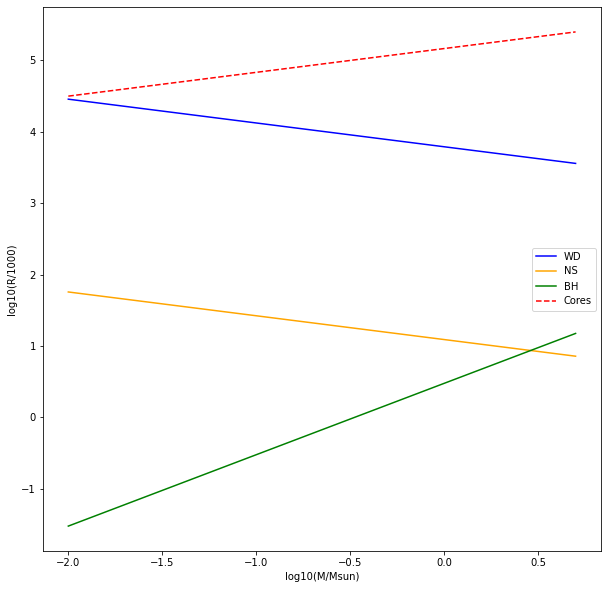

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

class MRRelations:
    def __init__(self, Mrange = (0.01, 5)):
        self.Ms = np.linspace(Mrange[0],Mrange[1], 1000)
        self.logMs = np.log10(self.Ms)

        self.Msun = 1.989e30 #kg
        self.Rsun = 695700*1000 #m

        self.WD = lambda Mratio: -5+np.log10(self.Rsun)-1/3*(np.log10(Mratio))+1/3*(np.log10(0.7))
        self.NS = lambda Mratio: np.log10(11)-1/3*(np.log10(Mratio))+1/3*np.log10(1.4)
        self.BH = lambda Mratio: np.log10(3)+np.log10(Mratio)

        self.Rswd = self.WD(self.Ms)
        self.Rsns = self.NS(self.Ms)
        self.Rsbh = self.BH(self.Ms)

  

        self.rhoavg = 1.5e5

        self.cores = lambda M: 1/3*np.log10(M/((4*np.pi/3)*self.rhoavg))-np.log10(1000)

        self.Rcores = self.cores(self.Ms*self.Msun)

        self.Rinitial = np.power(0.08/((4*np.pi/3)*self.rhoavg),1/3)
        self.omega0 = 1/43200 #rev per min

        self.omega = lambda M, R: (0.08*self.Msun*self.Rinitial*self.Rinitial*self.omega0/(M*R*R))

        self.logomegas = np.log10(self.rotationspeeds())



        

    def plotrelations(self, pathtaken = False):
        plt.figure(figsize=(10,10))
        plt.plot(self.logMs, self.Rswd, 'b',label = "WD")
        plt.plot(self.logMs, self.Rsns, 'orange', label = "NS")
        plt.plot(self.logMs, self.Rsbh, 'green', label = "BH")
        plt.plot(self.logMs, self.Rcores, '--r', label = 'Cores')
        if pathtaken == True:
            plt.plot(self.logMs, self.pathtaken(), '--m', label = "Hypothetical Path")

        plt.xlabel("log10(M/Msun)")
        plt.ylabel("log10(R/1000)")
        plt.legend(loc = "right")

    def pathtaken(self):
        Ms = self.Ms
        path = []
        for m in Ms:
            if m<=0.08:
                path.append(self.cores(m*self.Msun))
            elif 0.08<m<=1.4:
                path.append(self.WD(m))
            elif 1.4<m<=3:
                path.append(self.NS(m))
            elif 3<m:
                path.append(self.BH(m))

        
        
        return np.array(path)

    def rotationspeeds(self):
        Ms = self.Ms
        omega = []
        for m in Ms:
            if m<=0.08:
                m = m*self.Msun
                R = np.power(self.cores(m), 10)*1000
                omg = self.omega(m,R)
                omega.append(omg)
            elif 0.08<m<=1.4:
                R = np.power(self.WD(m), 10)*1000
                omg = self.omega(m,R)
                omega.append(omg)
            elif 1.4<m<=3:
                R = np.power(self.NS(m), 10)*1000
                omg = self.omega(m,R)
                omega.append(omg)
            

        
        
        return np.array(omega)

    def plotomegas(self):
        plt.figure(figsize=(10,10))
        plt.plot(self.logMs[:599], self.logomegas)
        plt.xlabel("log10(M/Msun)")
        plt.ylabel("log10(w) [rev/min]")

test = MRRelations()
test.plotrelations()


## QUestion 2b)
Here we are given an avergage density for the core (which we assume is spherical). As such if we equate this to the equation for the average density of a sphere $\rho = \frac{M}{4\pi/3R^3}$. Since we don't have an anlytical expression to relate the radius and mass of the sun's core we instead isolate R to get $R = (\frac{M}{4\pi/3 \rho})^{1/3}$. This allows us to numerically compute values of R over our given range of masses. In turn, we divide those by and thousand take the logarithm to get values compatible with our plot $$ log(\frac{R}{1000}) = 1/3log(\frac{M}{4\pi/3 \rho*})-log(1000)$$ where rho star is the average density. We then plot those against log(M/Msun). The argument for doing so is that we could express rho star where R and M are Msun and Rsun multiplied by some numerical factor <1 such that in the LH we have f(log(M/Msun)). Our line is plotted in the plot above. 

## Question 2c) 
For this, we interpret an object similar to the core of the sun as an object starting with a similar density than the core of the sun but unkown mass and radii. Assuming the density stay constant (as it gains mass the radius increases) As this object accrues mass, it will subsequently reach different mass limits where it would turn into one of the other remenants. Objects with masses less than 0.08 solar masses never sustain fusion, as such if our object started in this range it would be a brown dwarf. As it accrues mass, eventually it would gain enough mass to become a white dwarf/supported by degeneracy pressure. After which, the next limit would be the chandrasekar limit M=1.4Msun where it would turn into a NS. And lastly at m= 3Msun it would become a blackhole. 

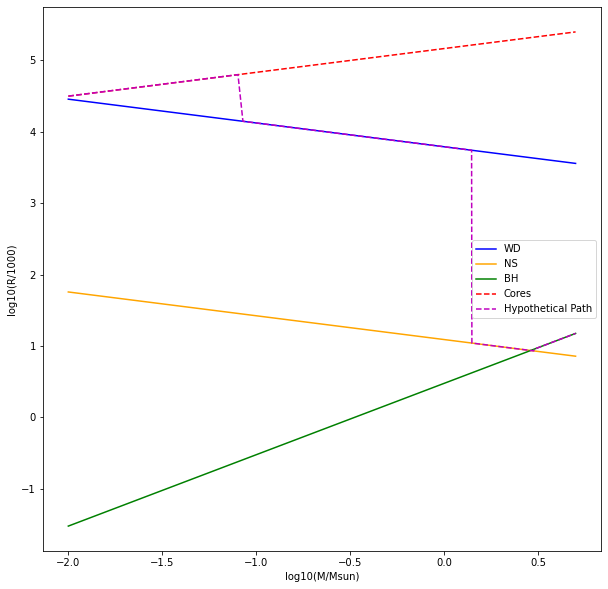

In [57]:
test.plotrelations(pathtaken=True)

## Question 2d)

We start by stating the angular momentum is inertia * angular velocity $L = I*\omega$. Moreover, we use the moment of unertia for a ball (i.e. full sphere)  $I = \frac{2}{5}MR^2$ and for simplicity assume that rho is roughly constant in our object. Then, $L = \frac{2}{5}MR^2 \omega $ and using conservation of angular momentum we have (in our case delta L is 0)
$$ \Delta L = \frac{2}{5}(MR^2\omega-M_0{R_0}^2\omega_0) $$

which in turns allows us to write 
$$ \omega = \frac{M_0{R_0}^2\omega_0}{MR^2} $$

We use our work from 2c) to find suitable values of R0 and M0. Then, accordingly to the regime the object falls into, we plug in values of R associated with the correct remenant which in turn will allow us to plot our log-log plot.





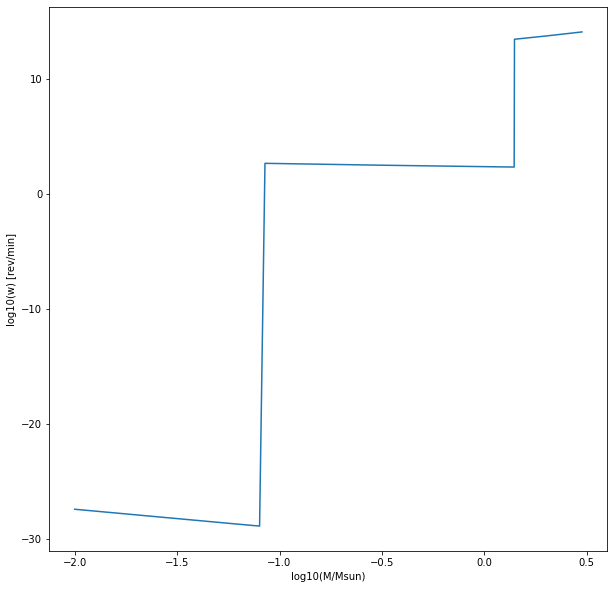

In [69]:
test.plotomegas()

## Question 3
Here we start from the luminosity equation in hydrostatic equilibrium $\frac{dL}{dr} = \frac{dM}{dr} \epsilon$ where epsilon is simply $\epsilon = \epsilon_{PP}+\epsilon_{CNO}$ and dMdr is the mass continuity equation.  Now, to integrate this we would need suitable boundary conditions and an equation rho(r) (since dMdr depends on it). This is because we want to avoid making any assumptions about uniform density. As such, we provide the mass continuity equation. This by itself does not help us much, we still don't know rho(r). But, we don't need it! As it turns our, if we combine the chain rule as well mass continuity with the radial derivative of luminosity we can get a new DE $\frac{dL}{dr} = \frac{dL}{dM}\frac{dM}{dr}$
$$ \frac{dL}{dM} = \frac{dL}{dr} / \frac{dM}{dr}  = \epsilon$$

We use the equations for epp and ecno as given in the final project sheet and assume Xcno follows the solar CNO abundance. To solve this we only need initial conditions on L(0), which of course is simply 0. We integrate over the given range of masses (i.e. from 0 to the mass of sirius B). Our last step then, is to try different values of X to find the largest value of x for which L(surface)= 0.03Lsun

In [113]:
import scipy.integrate as ode
class Ode:
    def __init__(self, f, y0 = (0), h = 0.01, ti = 0.01, tf = 1.053):

        self.y0 = y0
        self.ts = np.arange(ti,tf,h)


    #method to solve an IVP for the ODE that is passed
    def solve(self):
        return ode.odeint(self.f,self.y0, self.ts)



class WD(Ode):
    def __init__(self, M, R):
        Ode.__init__(self, self.f)
        self.M = M 
        self.R = R
        self.Tc = 1e7

        self.Msun = 1.989e30 

        self.xs = np.linspace(0,1,1000)
        self.X = 0
        self.Lsun = 3.828e26 #W
        
        self.Ls = 0
        self.rho = self.M/((4*np.pi/3)*self.R**3)
    def f(self, y, t):
        L = y[0]
        return np.array([self.rho*self.X**2*(1.07e-12*(self.Tc*1e-6)**4+8.24e-11*(0.03*(self.Tc*1e-6)**(19.9)))])

    def maxX(self):
            for x in self.xs:
                self.X = x
                L = self.solve()[-1]
            if L<= 0.03*self.Lsun:
                self.Ls = L
                

In [114]:
SiriusB = WD(M = 1.053*1.989e30, R = 0.008*695700*1000)
SiriusB.maxX()
print(SiriusB.X)


1.0


##Question 4a)
Here, we use Steffan-Boltzmann law in luminosity form and the fact that sigma_SB is defined in terms of our target variables. $L = \frac{ \sigma_{SB} }{(4\pi)^3} R_S^{-2}(\frac{hc}{k})^4$. As we stated, sigma sb is stated in terms of our target variables and we then end up with
$$ L = (\frac{\hbar c^2}{3840\pi}R_s^{-2}) $$

## Question 4b)
We use dE/dt=L to get $L=dE/dt=c^2dM/dt$ which we integrate and substitute Rs into to get the equation we have in the question (ran out of time don't know how else to explain this)